In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
from matplotlib.patches import Patch

In [3]:
from plot_config import *
from utils import *

In [4]:
rerun = False

In [5]:
# %%time
if rerun:
    ds4 = open_domain4()
    dsa = open_domain_all()
    box_plot4 = xr.Dataset()
    for var in ds4.data_vars:
        if '_' in var and var not in ['dif_v','dif_h']:
            # print(var)
            box_plot4[var] = ds4[var].mean(dim = 'space').chunk(9497)
    box_plot4.to_zarr('lineplotprep/box_plot4',mode = 'w')
    
    box_plota = xr.Dataset()
    for var in dsa.data_vars:
        if '_' in var and var not in ['dif_v','dif_h']:
            # print(var)
            box_plota[var] = dsa[var].mean(dim = 'space').chunk(9497)
    box_plota.to_zarr('lineplotprep/box_plota',mode = 'w')

In [6]:
loadbox_plot4 = xr.open_zarr('lineplotprep/box_plot4')
loadbox_plota = xr.open_zarr('lineplotprep/box_plota')
box_plot4 = {}
for var in loadbox_plot4:
    box_plot4[var] = np.array(loadbox_plot4[var])/NUMBER_OF_PARTICLE_domain4*365.25*10
box_plota = {}
for var in loadbox_plota:
    box_plota[var] = np.array(loadbox_plota[var])/NUMBER_OF_PARTICLE_domain_all*365.25*10

In [7]:
saves = ['figure7_'+region+'.png' for region in region_names]
saves

['figure7_gulf.png',
 'figure7_labr.png',
 'figure7_gdbk.png',
 'figure7_nace.png',
 'figure7_egrl.png']

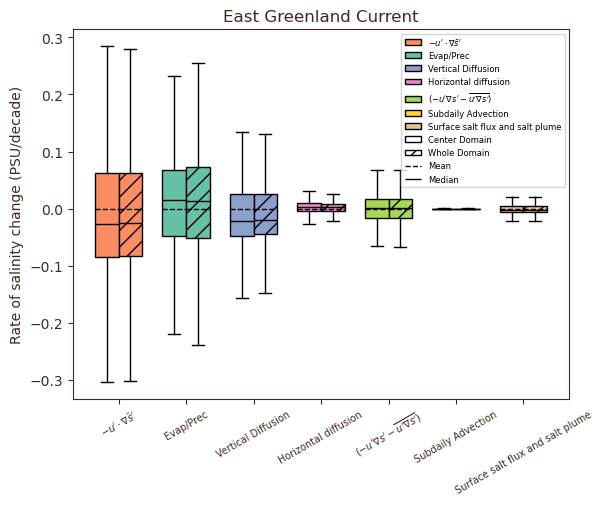

In [8]:
# a_region = 'labr'
# save_as = False
for a_region,save_as in zip(region_names, saves):
    plt.clf()

    labels = [term_dic[var] for var in rhs_list]
    data4 = [-box_plot4[var+'_'+a_region] for var in rhs_list]
    dataa = [-box_plota[var+'_'+a_region] for var in rhs_list]
    colors = [color_dic[var] for var in rhs_list]
    
    # Width of the bars
    bar_width = 0.35
    
    # Set up positions for bars
    positions1 = np.arange(len(labels))
    positions2 = positions1 + bar_width
    
    # thing = plt.boxplot(data, labels=labels, patch_artist=True,showfliers = False)
    thing1 = plt.boxplot(data4, positions=positions1, widths=bar_width, patch_artist=True,showfliers = False,showmeans = True,meanline = True)
    thing2 = plt.boxplot(dataa, positions=positions2, widths=bar_width, patch_artist=True,showfliers = False,showmeans = True,meanline = True)
    
    for patch, color in zip(thing1['boxes'], colors):
        patch.set_facecolor(color)
    
    for patch, color in zip(thing2['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_hatch('//')
    for meanline in thing1['means']:
        meanline.set_color('black')
    for meanline in thing2['means']:
        meanline.set_color('black')
    for medianline in thing1['medians']:
        medianline.set_color('black')
    for medianline in thing2['medians']:
        medianline.set_color('black')
    
    plt.xticks(positions1 + bar_width / 2, labels,fontsize = 7,rotation = 30)
    var_handles = [Patch(facecolor=color, edgecolor='black')
                      for j,color in enumerate(colors)]
    domain_handles = [Patch(facecolor='w', edgecolor='black', hatch = h)
                      for h in ['','//']]
    lgd_labels = labels+['Center Domain','Whole Domain']+['Mean', 'Median']
    plt.legend(labels = lgd_labels, handles = var_handles+domain_handles+[meanline,medianline],fontsize = 6)
    
    ax = plt.gca()
    tcolor = region_colors[a_region]
    ax.tick_params(color=tcolor, labelcolor=tcolor)
    for spine in ax.spines.values():
        spine.set_edgecolor(tcolor)
    # plt.yscale('symlog')
    plt.title(region_longnames[a_region],color = tcolor)
    plt.ylabel('Rate of salinity change (PSU/decade)',color = tcolor)
    
    if save_as:
        plt.savefig(save_as)